In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import preprocessing

In [3]:
X_train = np.array([[ 1., -1.,  2.],
...                 [ 2.,  0.,  0.],
...                 [ 0.,  1., -1.]])

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [5]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [6]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [7]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [8]:
print("mean:", X_scaled.mean(axis=0),", std:",  X_scaled.std(axis=0))

mean: [0. 0. 0.] , std: [1. 1. 1.]


In [9]:
X_train = np.array([[ 1., -1.,  2.],
...                     [ 2.,  0.,  0.],
...                     [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [10]:
min_max_scaler.scale_

array([0.5       , 0.5       , 0.33333333])

In [11]:
min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

In [12]:
X_train = np.array([[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [13]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

In [14]:
max_abs_scaler.scale_

array([2., 1., 2.])

# Normalization

In [15]:
X = [[ 1., -1.,  2.],
      [ 2.,  0.,  0.],
      [ 0.,  1., -1.]]

X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

# Encoding categorical features

In [16]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OrdinalEncoder()

In [17]:
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [18]:
enc = preprocessing.OrdinalEncoder()
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

In [19]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

## Exercise 1

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.dropna(inplace=True)

numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['number']).columns

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents    tenure  \
0  7590-VHVEG  Female      -0.439916     Yes         No -1.277445   
1  5575-GNVDE    Male      -0.439916      No         No  0.066327   
2  3668-QPYBK    Male      -0.439916      No         No -1.236724   
3  7795-CFOCW    Male      -0.439916      No         No  0.514251   
4  9237-HQITU  Female      -0.439916      No         No -1.236724   

  PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0           No  No phone service             DSL             No  ...   
1          Yes                No             DSL            Yes  ...   
2          Yes                No             DSL            Yes  ...   
3           No  No phone service             DSL            Yes  ...   
4          Yes                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month

## Exercise 2

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
Mean Squared Error: 18.943211722315272
R-squared: 0.9678055545167994


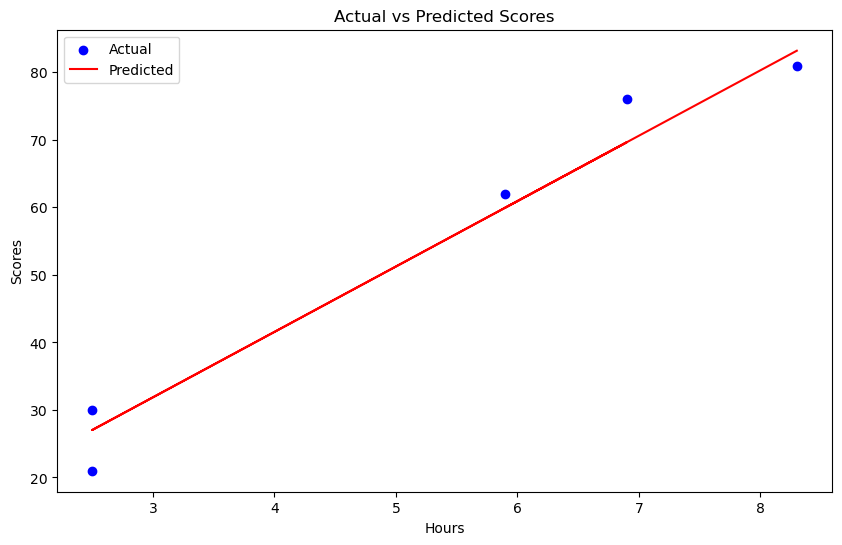

In [5]:
import pandas as pd
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('score.csv')

print(data.head())
print(data.describe())

X = data[['Hours']]
y = data['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = sklearn.metrics.mean_squared_error(y_test, predictions)
r_squared = sklearn.metrics.r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Actual vs Predicted Scores')
plt.legend()
plt.show()